# Regularization

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(123)

### Sample data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## OLS Regression

### Exploring variation

In [3]:
topn = 20

In [4]:
X = housing['data'][:topn,:1]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     62.44
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           2.92e-07
Time:                        18:40:39   Log-Likelihood:                -10.134
No. Observations:                  20   AIC:                             24.27
Df Residuals:                      18   BIC:                             26.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0572      0.206      5.138      0.0

### Plot x1 against predicted values to see the variation

In [5]:
x1 = housing['data'][:topn,0]

In [6]:
y_hat = res.fittedvalues

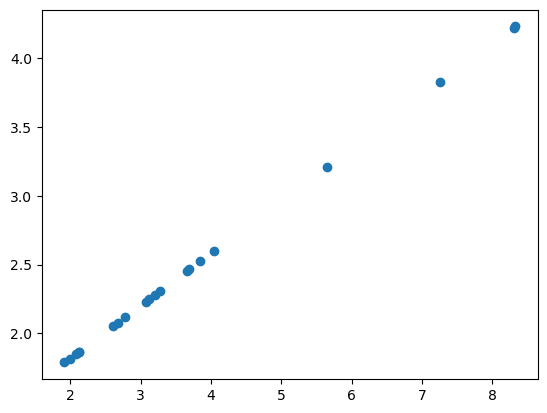

In [7]:
plt.scatter(x1, y_hat)

Straight line - no variation because there's just one dimension!

Let's add some variation by including more features:

In [8]:
X = housing['data'][:topn,:2]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     33.11
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.37e-06
Time:                        18:44:48   Log-Likelihood:                -9.2232
No. Observations:                  20   AIC:                             24.45
Df Residuals:                      17   BIC:                             27.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1124      0.941     -0.119      0.9

R-Squared has increased. Now look at the variation of x1

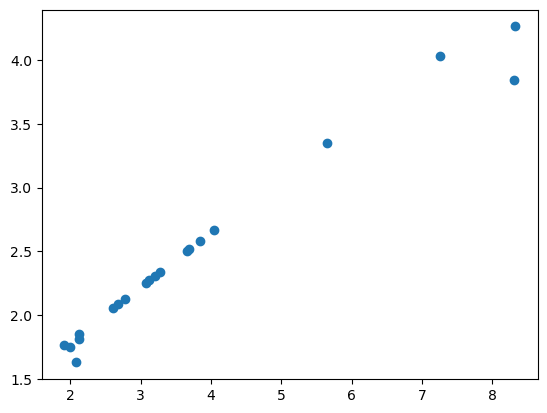

In [9]:
plt.scatter(x1, res.fittedvalues)

This variation has increased, because for each value of X there can be different ages for the houses that might also contribute to the house price.

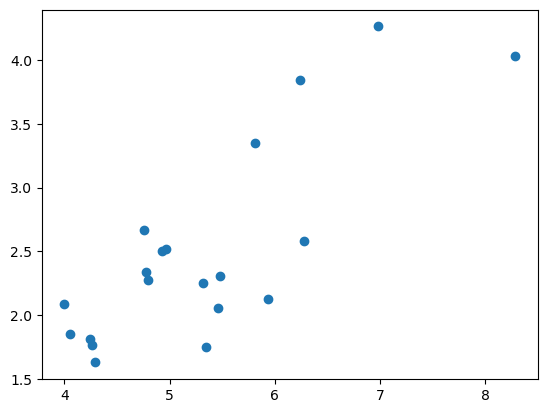

In [10]:
# House Age
x2 = housing['data'][:topn,2]
plt.scatter(x2, res.fittedvalues)

In [11]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     12.03
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           0.000118
Time:                        19:01:27   Log-Likelihood:                -6.3046
No. Observations:                  20   AIC:                             26.61
Df Residuals:                      13   BIC:                             33.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      3.635      0.005      0.9

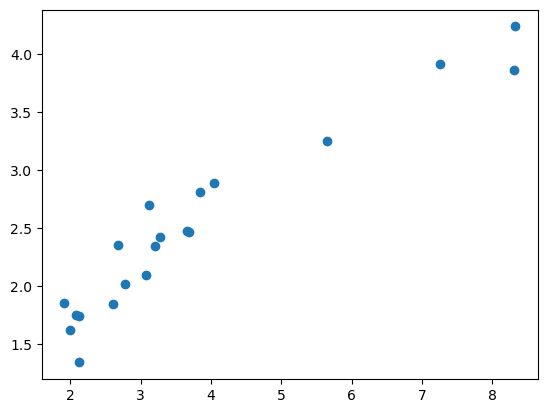

In [12]:
plt.scatter(x1, res.fittedvalues)

Generally, the more variables we add to our model, the more variation will occur and increase the variance of our OLS regression.

How can we add variables without risking overfitting?

Regularization! (Adding bias)

Do the same with Ridge Regression...

## Ridge Regression

Implementation in Statsmodels: 

`statsmodels.regression.linear_model.OLS.fit_regularized`:

`L1_wt`: The fraction of the penalty given to the L1 penalty term. Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [13]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 0.5, L1_wt = 0)

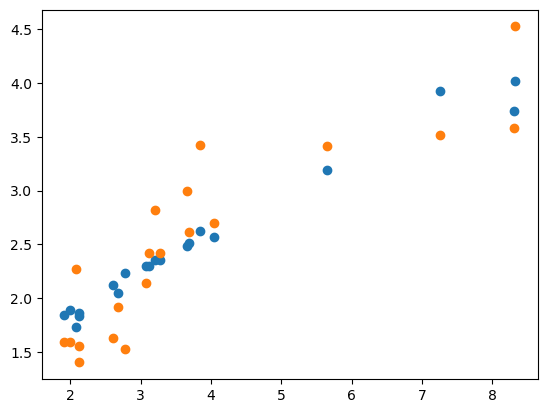

In [16]:
plt.scatter(x1, res.fittedvalues)
plt.scatter(x1, y)

In [17]:
res.params

array([ 9.43710490e-03,  3.45901690e-01,  1.64002452e-02,  7.62706124e-02,
        1.17731611e-02,  4.47719623e-05, -3.94367829e-02])

We can see that we have removed the outlier points on the bottom, making our model probably a bit more robust when new data comes in.

### Regularization too high

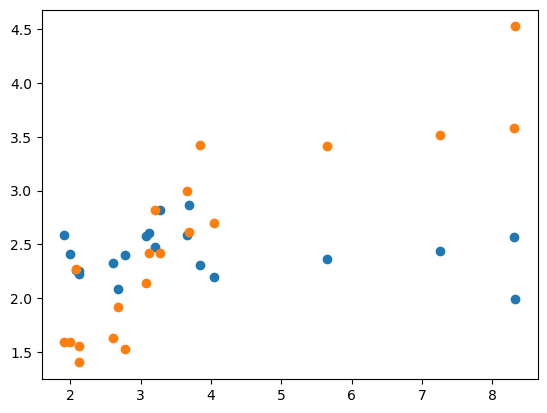

In [22]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 50, L1_wt = 0)
plt.scatter(x1, res.fittedvalues)
plt.scatter(x1, y)

In [ ]:
res.params

array([0.00297732, 0.07678914, 0.02974868, 0.04176642, 0.00309189,
       0.00047073, 0.00883524])

## Lasso regression

Implementation in Statsmodels: 

`statsmodels.regression.linear_model.OLS.fit_regularized`:

`L1_wt`: The fraction of the penalty given to the L1 penalty term. Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [23]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 0.8, L1_wt = 1)

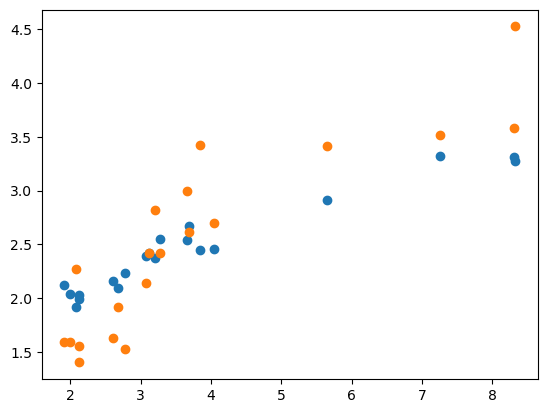

In [25]:
plt.scatter(x1, res.fittedvalues)
plt.scatter(x1, y)

The result looks similar to Ridge regression, but take a look at the parameters (first one is intercept):

In [26]:
res.params

array([0.        , 0.25907503, 0.02508605, 0.        , 0.        ,
       0.00026565, 0.        ])

### Try other values for alpha

In [ ]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 1.5, L1_wt = 1)

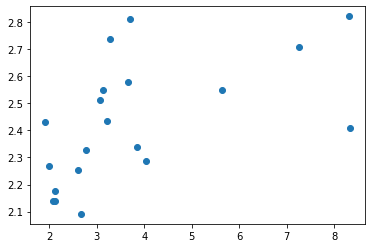

In [ ]:
plt.scatter(x1, res.fittedvalues)

In [27]:
res.params

array([0.        , 0.25907503, 0.02508605, 0.        , 0.        ,
       0.00026565, 0.        ])

In [28]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()

In [29]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     12.03
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           0.000118
Time:                        20:14:31   Log-Likelihood:                -6.3046
No. Observations:                  20   AIC:                             26.61
Df Residuals:                      13   BIC:                             33.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      3.635      0.005      0.9

## Elasticnet Regression

Implementation in Statsmodels: 

`statsmodels.regression.linear_model.OLS.fit_regularized`:

`L1_wt`: The fraction of the penalty given to the L1 penalty term. Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [ ]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 0.5, L1_wt = 0.5)

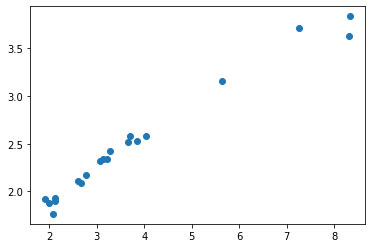

In [ ]:
plt.scatter(x1, res.fittedvalues)

We still allow variation, but capture the overall trend.

In [ ]:
res.params

array([0.00000000e+00, 3.51223025e-01, 2.14277789e-02, 0.00000000e+00,
       0.00000000e+00, 1.10253819e-04, 0.00000000e+00])

### More weight towards L1 (Lasso Regression)

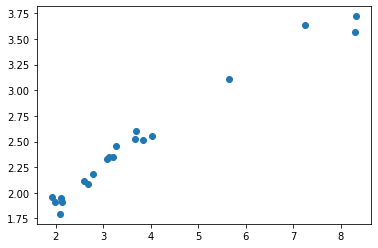

In [ ]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 0.5, L1_wt = 0.8)
plt.scatter(x1, res.fittedvalues)

### More weight towards L2 (Ridge Regression)

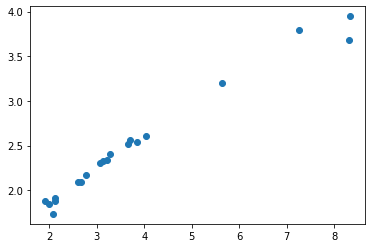

In [ ]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha = 0.5, L1_wt = 0.2)
plt.scatter(x1, res.fittedvalues)

How do we know which one is best? Check with cross-validation!

### Predict values

In [31]:
new_data = housing['data'][1051:1100,:6]
new_data = sm.add_constant(new_data)
y_hat = res.predict(new_data)
y_hat

array([0.96217737, 0.61778574, 0.76560995, 0.75422506, 1.14271877,
       1.440708  , 0.96500269, 0.13899928, 0.80554982])

In [ ]:
y_aut   